In [1]:
import numpy as np
import matplotlib.pyplot as plt

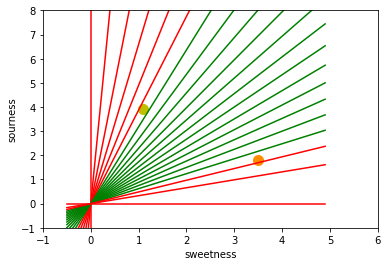

In [2]:
def create_distance_function(a,b,c):
    def distance(x,y):
        """ returns tuple (d, pos)
            d is the distance
            If pos == -1 point is below the line, 
            0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        
        if nom == 0:
            pos = 0
        elif (nom < 0 and b < 0) or (nom > 0 and b > 0):
            pos = -1
        else:
            pos = 1
            
        return (np.absolute(nom)/np.sqrt(a**2 + b**2),pos)
    return distance
points = [ (3.5, 1.8), (1.1, 3.9) ]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])
X = np.arange(-0.5, 5, 0.1)

colors = ["r", ""] # for the samples

size = 10
for (index, (x, y)) in enumerate(points):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)
step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    #print("x: ", x, "slope: ", slope)
    Y = slope * X
    
    results = []
    for point in points:
        results.append(dist4line1(*point))
    #print(slope, results)
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-")
    else:
        ax.plot(X, Y, "r-")
        

plt.show()

In [3]:
np.ones(5)*0.5

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [4]:
class A:
    def __init__(self):
        print("init")
    def __call__(self):
        print("call")
a = A()

init


In [5]:
a()

call


In [6]:
class Perceptron:
    
    def __init__(self,input_length,weights = None):
        if weights is None:
            self.weights = np.ones(input_length)*0.5
        else:
            self.weights = weights
    
    @staticmethod
    def unit_step_function(x):
        if x >0.5:
            return 1
        return 0
    def __call__(self,in_data):
        weigted_input = self.weights*in_data
        weighted_sum = weigted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)

In [7]:
p = Perceptron(2,np.array([0.5,0.5]))
data_in = np.empty((2,))

for in1 in range(3):
    for in2 in range(2):
        data_in = in1,in2
        data_out = p(data_in)
        print(data_in,data_out)

(0, 0) 0
(0, 1) 0
(1, 0) 0
(1, 1) 1
(2, 0) 1
(2, 1) 1


In [8]:
x = np.random.random(10)

In [9]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

In [10]:
dir(np.random.random)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [11]:
x*2 -1

array([ 0.32602535, -0.11934442,  0.12712153, -0.89954298, -0.35989971,
       -0.16334503, -0.21298149, -0.38584239, -0.99892641, -0.09828794])

In [12]:
from collections import Counter

class Perceptron:
    
    def __init__(self,input_length,weights = None):
        if weights == None:
            self.weights = np.random.random((input_length))*2 -1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0
    
    def __call__(self,in_data):
        weighted_input = self.weights*in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,target_result,calculted_result,in_data):
        error = target_result-calculted_result
        for i in range(len(in_data)):
            correction = error * in_data[i]*self.learning_rate
            self.weights[i] += correction
    
def above_line(point, line_function):
    x,y = point
    if (y > line_function(x)):
        return 1
    else:
        return 0
points = np.random.randint(1,100,[100,2])
p = Perceptron(2)
def lin1(x):
    return x+4

for point in points:
    p.adjust(above_line(point,lin1),p(point),point)
    
evaluation = Counter()
for point in points:
    if p(point) == above_line(point,lin1):
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] +=1
        
print(evaluation.most_common())

[('correct', 96), ('wrong', 4)]


In [13]:
np.random.random((2))*2 -1

array([ 0.49353758, -0.27429319])

In [14]:
p = Perceptron(2)

In [15]:
print(p([100,2]))

0


0.5790463746340376


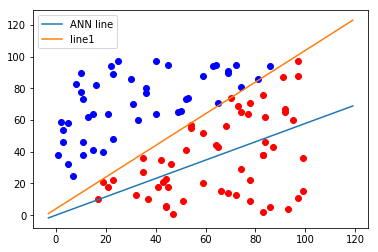

In [16]:
%matplotlib inline 

from matplotlib import pyplot as plt

cls = [[], []]
for point in points:
    cls[above_line(point, lin1)].append(tuple(point))


colours = ("r", "b")
for i in range(2):
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colours[i])
    
X = np.arange(-3, 120)
    
m = -p.weights[0] / p.weights[1]
print(m)
plt.plot(X, m*X, label="ANN line")
plt.plot(X, lin1(X), label="line1")
plt.legend()
plt.show()

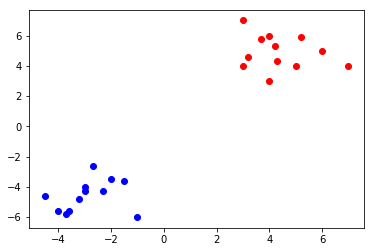

In [17]:
from matplotlib import pyplot as plt

class1 = [(3, 4), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8),
          (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3) ] 
class2 = [(-3, -4), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6), 
          (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6), 
          (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8) ]


X, Y = zip(*class1)
plt.scatter(X, Y, c="r")

X, Y = zip(*class2)
plt.scatter(X, Y, c="b")
plt.show()

In [18]:
from itertools import chain

p = Perceptron(2)

def lin1(x):
    return  x + 4

for point in class1:
    p.adjust(1, 
             p(point), 
             point)

for point in class2:
    p.adjust(0, 
             p(point), 
             point)
    
evaluation = Counter()
for point in chain(class1, class2):
    if p(point) == 1:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1
        
testpoints = [(3.9, 6.9), (-2.9, -5.9)]
for point in testpoints:
    print(p(point))
        
print(evaluation.most_common())

1
0
[('correct', 12), ('wrong', 12)]


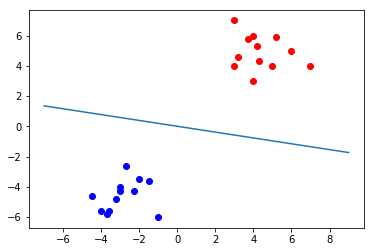

In [19]:
X, Y = zip(*class1)
plt.scatter(X, Y, c="r")

X, Y = zip(*class2)
plt.scatter(X, Y, c="b")

x = np.arange(-7, 10)
y = 5*x + 10 

m = -p.weights[0] / p.weights[1]
plt.plot(x, m*x)
plt.show()

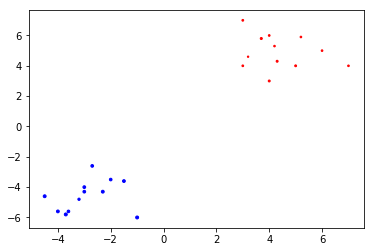

In [21]:
from matplotlib import pyplot as plt

class1 = [(3, 4, 3), (4.2, 5.3, 2.5), (4, 3, 3.8), 
          (6, 5, 2.7), (4, 6, 2.9), (3.7, 5.8, 4.2),
          (3.2, 4.6, 1.9), (5.2, 5.9, 2.7), (5, 4, 3.5), 
          (7, 4, 2.7), (3, 7, 3.1), (4.3, 4.3, 3.8) ] 
class2 = [(-3, -4, 7.6), (-2, -3.5, 6.9), (-1, -6, 8.6), 
          (-3, -4.3, 7.4), (-4, -5.6, 7.9), (-3.2, -4.8, 5.3),
          (-2.3, -4.3, 8.1), (-2.7, -2.6, 7.3), (-1.5, -3.6, 7.8), 
          (-3.6, -5.6, 6.8), (-4.5, -4.6, 8.3), (-3.7, -5.8, 8.7) ]


X, Y, Z = zip(*class1)
plt.scatter(X, Y, Z, c="r")

X, Y, Z = zip(*class2)
plt.scatter(X, Y, Z, c="b")
plt.show()

If two data clusters (classes) can be separated by a decision boundary in the form of a linear equation

$\sum_{n=1}^{n} x_i*w_i = 0 $ 
<br>
<br>
they are called linearly separable.

Otherwise, i.e. if such a decision boundary does not exist, the two classes are called linearly inseparable. In this case, we cannot use a simple neural network.

In the following section, we will introduce the XOR problem for neural networks. It is the simplest example of a non linearly separable neural network. I can be solved with an additional layer of neurons, which is called a hidden layer.



# Neural Network with bias values

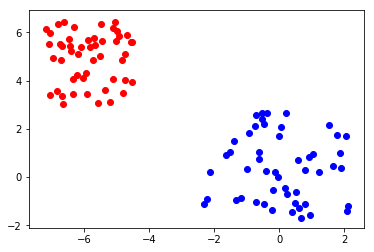

In [22]:
import numpy as np
from matplotlib import pyplot as plt

npoints = 50
X, Y = [], []
# class 0
X.append(np.random.uniform(low=-2.5, high=2.3, size=(npoints,)) )
Y.append(np.random.uniform(low=-1.7, high=2.8, size=(npoints,)))

# class 1
X.append(np.random.uniform(low=-7.2, high=-4.4, size=(npoints,)) )
Y.append(np.random.uniform(low=3, high=6.5, size=(npoints,)))

learnset = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append((p, i))

colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

[('correct', 75), ('wrong', 25)]
2.168519565949491


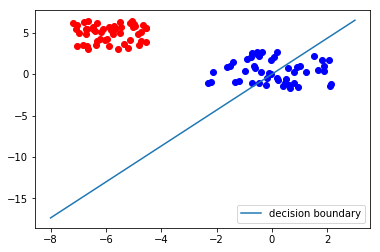

In [24]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction 

     
  
p = Perceptron(2)


for point, label in learnset:
    p.adjust(label, 
             p(point), 
             point)

evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())


colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

XR = np.arange(-8, 4)  
m = -p.weights[0] / p.weights[1]
print(m)
plt.plot(XR, m*XR, label="decision boundary")
plt.legend()
plt.show()

It is not possible to find a solution with one neuron and without a bias node. The reason is that the class of the blue data points spread around the origin. Without bias nodes we get only lines going through the origin as we have mentioned earlier. It is easy to see that no line going through the origin can separate the blue from the red data.

[('correct', 85), ('wrong', 15)]
2.3933200136544643 2.5235785361580954


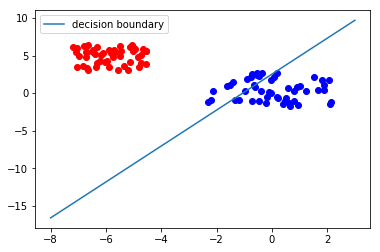

In [33]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            # input_length + 1 because bias needs a weight as well
            self.weights = np.random.random((input_length + 1)) * 2 - 1
        self.learning_rate = 0.05
        self.bias = 1
    
    @staticmethod
    def sigmoid_function(x):
        res = 1 / (1 + np.power(np.e, -x))
        return 0 if res < 0.5 else 1
        
    def __call__(self, in_data):
        weighted_input = self.weights[:-1] * in_data
        weighted_sum = weighted_input.sum() + self.bias *self.weights[-1]
        return Perceptron.sigmoid_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i]  *self.learning_rate
            #print("weights: ", self.weights)
            #print(target_result, calculated_result, in_data, error, correction)
            self.weights[i] += correction 
        # correct the bias:
        correction = error * self.bias * self.learning_rate
        self.weights[-1] += correction 

p = Perceptron(2)

for point, label in learnset:
    p.adjust(label, 
             p(point), 
             point)

evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())


colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

XR = np.arange(-8, 4)  
m = -p.weights[0] / p.weights[1]

b = -p.weights[-1]/p.weights[1]
print(m, b)
plt.plot(XR, m*XR + b, label="decision boundary")
plt.legend()
plt.show()